In [2]:
import yfinance as yf
df = yf.download("SBIN.NS", start="2015-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,300.547485,6138488
2015-01-02,314.350006,318.299988,314.350006,315.250000,301.743988,9935094
2015-01-05,316.250000,316.799988,312.100006,312.750000,299.351074,9136716
2015-01-06,310.000000,311.100006,298.700012,299.899994,287.051605,15329257
2015-01-07,300.000000,302.549988,295.149994,300.149994,287.290863,15046745


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,256.950012,263.899994,255.600006,263.000000,260.594055,29056404
2020-12-24,265.000000,268.850006,264.649994,266.850006,264.408844,28585509
2020-12-28,268.750000,276.000000,268.000000,275.200012,272.682465,36870242
2020-12-29,276.299988,279.899994,274.700012,277.899994,275.357758,45032526
2020-12-30,278.000000,278.700012,272.500000,276.899994,274.366882,30971894


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0       314.000000
1       315.250000
2       312.750000
3       299.899994
4       300.149994
           ...    
1474    263.000000
1475    266.850006
1476    275.200012
1477    277.899994
1478    276.899994
Name: Close, Length: 1479, dtype: float64

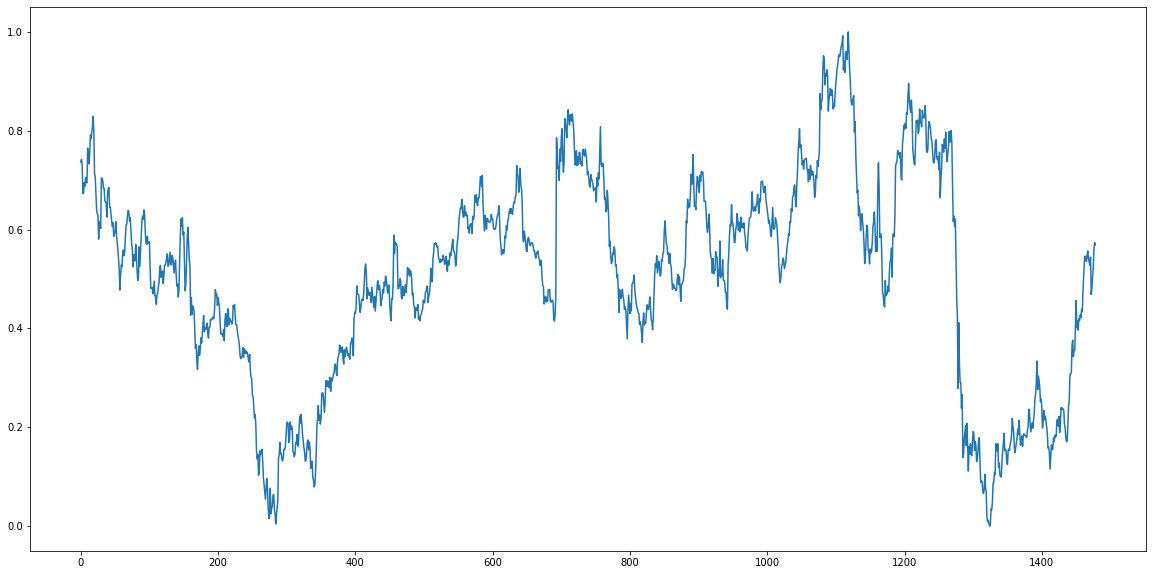

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df1)

#LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0       314.000000
1       315.250000
2       312.750000
3       299.899994
4       300.149994
           ...    
1474    263.000000
1475    266.850006
1476    275.200012
1477    277.899994
1478    276.899994
Name: Close, Length: 1479, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.73640263]
 [0.7420447 ]
 [0.73076056]
 ...
 [0.56127291]
 [0.57345969]
 [0.56894604]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(961, 518)

In [16]:
train_data

array([[0.73640263],
       [0.7420447 ],
       [0.73076056],
       [0.67276008],
       [0.67388849],
       [0.69510272],
       [0.68765522],
       [0.70525845],
       [0.69623114],
       [0.6944257 ],
       [0.7648386 ],
       [0.74294748],
       [0.732566  ],
       [0.75513427],
       [0.79146927],
       [0.78447302],
       [0.79711133],
       [0.80884672],
       [0.82938393],
       [0.79508013],
       [0.71360873],
       [0.70706388],
       [0.67456552],
       [0.64184152],
       [0.6316858 ],
       [0.62942897],
       [0.58068157],
       [0.61588801],
       [0.60979469],
       [0.60234705],
       [0.70458142],
       [0.70345301],
       [0.69893936],
       [0.68381859],
       [0.68359282],
       [0.65763931],
       [0.65628527],
       [0.65312566],
       [0.62536671],
       [0.67276008],
       [0.68223878],
       [0.684947  ],
       [0.64545253],
       [0.64522676],
       [0.63100878],
       [0.61724219],
       [0.60618368],
       [0.613

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 7s 206ms/step - loss: 0.0539 - val_loss: 0.0385
Epoch 2/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0101 - val_loss: 0.0162
Epoch 3/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0062 - val_loss: 0.0137
Epoch 4/100
14/14 [==============================] - 2s 124ms/step - loss: 0.0052 - val_loss: 0.0120
Epoch 5/100
14/14 [==============================] - 2s 123ms/step - loss: 0.0045 - val_loss: 0.0101
Epoch 6/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0043 - val_loss: 0.0093
Epoch 7/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0041 - val_loss: 0.0099
Epoch 8/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0041 - val_loss: 0.0081
Epoch 9/100
14/14 [==============================] - 2s 124ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 10/100
14/14 [==============================] - 2s 126ms/step - loss: 0.0035 - val_lo

14/14 [==============================] - 2s 141ms/step - loss: 9.5105e-04 - val_loss: 0.0016
Epoch 82/100
14/14 [==============================] - 2s 140ms/step - loss: 9.5638e-04 - val_loss: 0.0014
Epoch 83/100
14/14 [==============================] - 2s 140ms/step - loss: 9.9521e-04 - val_loss: 0.0014
Epoch 84/100
14/14 [==============================] - 2s 146ms/step - loss: 9.3792e-04 - val_loss: 0.0014
Epoch 85/100
14/14 [==============================] - 2s 139ms/step - loss: 9.7565e-04 - val_loss: 0.0014
Epoch 86/100
14/14 [==============================] - 2s 139ms/step - loss: 8.7906e-04 - val_loss: 0.0017
Epoch 87/100
14/14 [==============================] - 2s 141ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 88/100
14/14 [==============================] - 2s 138ms/step - loss: 8.5817e-04 - val_loss: 0.0013
Epoch 89/100
14/14 [==============================] - 2s 141ms/step - loss: 8.4079e-04 - val_loss: 0.0013
Epoch 90/100
14/14 [==============================] - 2s 141ms/

In [55]:
model.save('kera.h5')

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.7.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

261.8804375131694

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

269.4667138735522

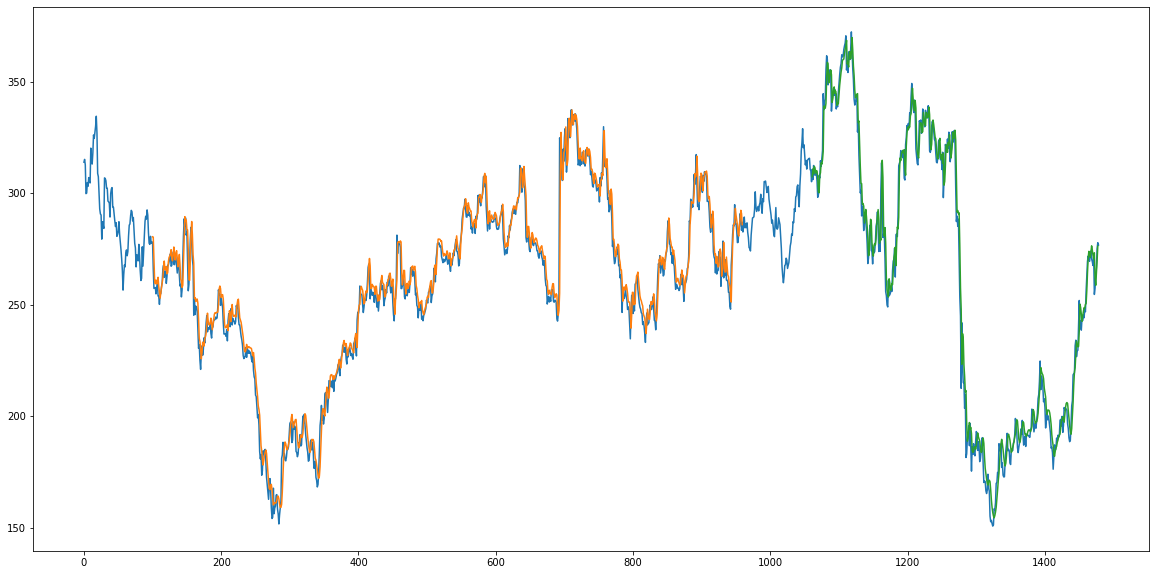

In [39]:
#Plotting 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

518

In [43]:
x_input=test_data[418:].reshape(1,-1)
x_input.shape


(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.15301284479493105,
 0.1708417645235718,
 0.1618144564206757,
 0.13044457453769076,
 0.13563524914769798,
 0.15098171424635842,
 0.17716092151933616,
 0.17896635559075735,
 0.1263823134405455,
 0.08824188160749347,
 0.09140149454182311,
 0.08982168807465829,
 0.07131567891456325,
 0.06589930782740461,
 0.07244409242742522,
 0.10494245669616731,
 0.07718344295602475,
 0.07018726540170117,
 0.02008574675436481,
 0.008801611625744776,
 0.011509762732876516,
 0.004964978132855902,
 0.0,
 0.002482454629980424,
 0.0349808188987224,
 0.03317531595440615,
 0.047167671063053196,
 0.0866621440132237,
 0.08756486104893424,
 0.1085533248390097,
 0.10471676021901588,
 0.16677950342642656,
 0.16226584937497857,
 0.15165873480491754,
 0.1663281104721237,
 0.11870904645476776,
 0.12773635455766386,
 0.10313695375185106,
 0.0995260167361135,
 0.09975171321326493,
 0.1299931815833879,
 0.15188443128206897,
 0.1663281104721237,
 0.18776796721650202,
 0.15233582423637182,
 0.155269671820655,
 0.15233582

In [57]:
#demonstrate prediction for next 90 days
fo
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 100, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 100,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.1577522  0.15955763 0.14872489 0.11509818 0.14150301 0.16429698
 0.15436695 0.15594669 0.17806364 0.17106746 0.1839314  0.17986907
 0.18348001 0.21417287 0.21597831 0.20243734 0.22207177 0.18957347
 0.20356576 0.23990069 0.23561273 0.23877227 0.23674114 0.23448431
 0.206951   0.19769799 0.17874066 0.17084176 0.17332429 0.20401715
 0.24328593 0.25344165 0.30602569 0.30850821 0.30986232 0.36492889
 0.37621302 0.34281201 0.35477317 0.35567588 0.40329495 0.45655608
 0.40126382 0.41480478 0.39652447 0.41976983 0.41593319 0.42699163
 0.42157526 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642
 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925 0.5407357
 0.53509363 0.5274205  0.54434671 0.46874293 0.48115555 0.50620627
 0.52358387 0.56127291 0.57345969 0.56894604 0.57686275 0.57869351
 0.58376193 0.59013271 0.59706646 0.60419381 0.61132008 0.61835551
 0.62526351 0.63203073 0.63865012 0.6451149  0.65141737 0.65754896
 0.66350263 0.66927296 0.67485547 0.68024939 0.6854

9 day output [[0.76081806]]
10 day input [0.1839314  0.17986907 0.18348001 0.21417287 0.21597831 0.20243734
 0.22207177 0.18957347 0.20356576 0.23990069 0.23561273 0.23877227
 0.23674114 0.23448431 0.206951   0.19769799 0.17874066 0.17084176
 0.17332429 0.20401715 0.24328593 0.25344165 0.30602569 0.30850821
 0.30986232 0.36492889 0.37621302 0.34281201 0.35477317 0.35567588
 0.40329495 0.45655608 0.40126382 0.41480478 0.39652447 0.41976983
 0.41593319 0.42699163 0.42157526 0.43872716 0.43376211 0.47596474
 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065 0.54886036
 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671 0.46874293
 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969 0.56894604
 0.57686275 0.57869351 0.58376193 0.59013271 0.59706646 0.60419381
 0.61132008 0.61835551 0.62526351 0.63203073 0.63865012 0.6451149
 0.65141737 0.65754896 0.66350263 0.66927296 0.67485547 0.68024939
 0.68545496 0.69047397 0.69530988 0.69996649 0.70444983 0.70876551
 0.71292001 0.71692097

19 day output [[0.7839211]]
20 day input [0.23561273 0.23877227 0.23674114 0.23448431 0.206951   0.19769799
 0.17874066 0.17084176 0.17332429 0.20401715 0.24328593 0.25344165
 0.30602569 0.30850821 0.30986232 0.36492889 0.37621302 0.34281201
 0.35477317 0.35567588 0.40329495 0.45655608 0.40126382 0.41480478
 0.39652447 0.41976983 0.41593319 0.42699163 0.42157526 0.43872716
 0.43376211 0.47596474 0.5084631  0.53599642 0.54637777 0.53938166
 0.53577065 0.54886036 0.55675925 0.5407357  0.53509363 0.5274205
 0.54434671 0.46874293 0.48115555 0.50620627 0.52358387 0.56127291
 0.57345969 0.56894604 0.57686275 0.57869351 0.58376193 0.59013271
 0.59706646 0.60419381 0.61132008 0.61835551 0.62526351 0.63203073
 0.63865012 0.6451149  0.65141737 0.65754896 0.66350263 0.66927296
 0.67485547 0.68024939 0.68545496 0.69047397 0.69530988 0.69996649
 0.70444983 0.70876551 0.71292001 0.71692097 0.72077537 0.72449064
 0.72807467 0.7315346  0.73487794 0.73811221 0.74124426 0.74428052
 0.74722743 0.75009114

29 day output [[0.8035129]]
30 day input [0.24328593 0.25344165 0.30602569 0.30850821 0.30986232 0.36492889
 0.37621302 0.34281201 0.35477317 0.35567588 0.40329495 0.45655608
 0.40126382 0.41480478 0.39652447 0.41976983 0.41593319 0.42699163
 0.42157526 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642
 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925 0.5407357
 0.53509363 0.5274205  0.54434671 0.46874293 0.48115555 0.50620627
 0.52358387 0.56127291 0.57345969 0.56894604 0.57686275 0.57869351
 0.58376193 0.59013271 0.59706646 0.60419381 0.61132008 0.61835551
 0.62526351 0.63203073 0.63865012 0.6451149  0.65141737 0.65754896
 0.66350263 0.66927296 0.67485547 0.68024939 0.68545496 0.69047397
 0.69530988 0.69996649 0.70444983 0.70876551 0.71292001 0.71692097
 0.72077537 0.72449064 0.72807467 0.7315346  0.73487794 0.73811221
 0.74124426 0.74428052 0.74722743 0.75009114 0.75287706 0.75559014
 0.75823599 0.76081806 0.76334161 0.76580989 0.7682265  0.77059472
 0.77291685 0.77519548

39 day output [[0.82056224]]
40 day input [0.40329495 0.45655608 0.40126382 0.41480478 0.39652447 0.41976983
 0.41593319 0.42699163 0.42157526 0.43872716 0.43376211 0.47596474
 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065 0.54886036
 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671 0.46874293
 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969 0.56894604
 0.57686275 0.57869351 0.58376193 0.59013271 0.59706646 0.60419381
 0.61132008 0.61835551 0.62526351 0.63203073 0.63865012 0.6451149
 0.65141737 0.65754896 0.66350263 0.66927296 0.67485547 0.68024939
 0.68545496 0.69047397 0.69530988 0.69996649 0.70444983 0.70876551
 0.71292001 0.71692097 0.72077537 0.72449064 0.72807467 0.7315346
 0.73487794 0.73811221 0.74124426 0.74428052 0.74722743 0.75009114
 0.75287706 0.75559014 0.75823599 0.76081806 0.76334161 0.76580989
 0.7682265  0.77059472 0.77291685 0.77519548 0.77743334 0.77963239
 0.78179437 0.78392112 0.78601426 0.78807521 0.79010427 0.79210365
 0.79407352 0.7960152 

50 day output [[0.83689964]]
51 day input [0.47596474 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065
 0.54886036 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671
 0.46874293 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969
 0.56894604 0.57686275 0.57869351 0.58376193 0.59013271 0.59706646
 0.60419381 0.61132008 0.61835551 0.62526351 0.63203073 0.63865012
 0.6451149  0.65141737 0.65754896 0.66350263 0.66927296 0.67485547
 0.68024939 0.68545496 0.69047397 0.69530988 0.69996649 0.70444983
 0.70876551 0.71292001 0.71692097 0.72077537 0.72449064 0.72807467
 0.7315346  0.73487794 0.73811221 0.74124426 0.74428052 0.74722743
 0.75009114 0.75287706 0.75559014 0.75823599 0.76081806 0.76334161
 0.76580989 0.7682265  0.77059472 0.77291685 0.77519548 0.77743334
 0.77963239 0.78179437 0.78392112 0.78601426 0.78807521 0.79010427
 0.79210365 0.79407352 0.7960152  0.79792929 0.79981661 0.80167776
 0.80351287 0.80532318 0.80710882 0.80887038 0.81060821 0.81232285
 0.81401491 0.815684

58 day output [[0.8474249]]
59 day input [0.5407357  0.53509363 0.5274205  0.54434671 0.46874293 0.48115555
 0.50620627 0.52358387 0.56127291 0.57345969 0.56894604 0.57686275
 0.57869351 0.58376193 0.59013271 0.59706646 0.60419381 0.61132008
 0.61835551 0.62526351 0.63203073 0.63865012 0.6451149  0.65141737
 0.65754896 0.66350263 0.66927296 0.67485547 0.68024939 0.68545496
 0.69047397 0.69530988 0.69996649 0.70444983 0.70876551 0.71292001
 0.71692097 0.72077537 0.72449064 0.72807467 0.7315346  0.73487794
 0.73811221 0.74124426 0.74428052 0.74722743 0.75009114 0.75287706
 0.75559014 0.75823599 0.76081806 0.76334161 0.76580989 0.7682265
 0.77059472 0.77291685 0.77519548 0.77743334 0.77963239 0.78179437
 0.78392112 0.78601426 0.78807521 0.79010427 0.79210365 0.79407352
 0.7960152  0.79792929 0.79981661 0.80167776 0.80351287 0.80532318
 0.80710882 0.80887038 0.81060821 0.81232285 0.81401491 0.81568426
 0.81733191 0.81895775 0.82056224 0.8221457  0.82370871 0.82525128
 0.82677406 0.82827687

68 day output [[0.8592113]]
69 day input [0.56894604 0.57686275 0.57869351 0.58376193 0.59013271 0.59706646
 0.60419381 0.61132008 0.61835551 0.62526351 0.63203073 0.63865012
 0.6451149  0.65141737 0.65754896 0.66350263 0.66927296 0.67485547
 0.68024939 0.68545496 0.69047397 0.69530988 0.69996649 0.70444983
 0.70876551 0.71292001 0.71692097 0.72077537 0.72449064 0.72807467
 0.7315346  0.73487794 0.73811221 0.74124426 0.74428052 0.74722743
 0.75009114 0.75287706 0.75559014 0.75823599 0.76081806 0.76334161
 0.76580989 0.7682265  0.77059472 0.77291685 0.77519548 0.77743334
 0.77963239 0.78179437 0.78392112 0.78601426 0.78807521 0.79010427
 0.79210365 0.79407352 0.7960152  0.79792929 0.79981661 0.80167776
 0.80351287 0.80532318 0.80710882 0.80887038 0.81060821 0.81232285
 0.81401491 0.81568426 0.81733191 0.81895775 0.82056224 0.8221457
 0.82370871 0.82525128 0.82677406 0.82827687 0.82976043 0.83122516
 0.83267111 0.83409888 0.83550817 0.83689964 0.8382737  0.83963078
 0.84097075 0.84229374

78 day output [[0.86968064]]
79 day input [0.63203073 0.63865012 0.6451149  0.65141737 0.65754896 0.66350263
 0.66927296 0.67485547 0.68024939 0.68545496 0.69047397 0.69530988
 0.69996649 0.70444983 0.70876551 0.71292001 0.71692097 0.72077537
 0.72449064 0.72807467 0.7315346  0.73487794 0.73811221 0.74124426
 0.74428052 0.74722743 0.75009114 0.75287706 0.75559014 0.75823599
 0.76081806 0.76334161 0.76580989 0.7682265  0.77059472 0.77291685
 0.77519548 0.77743334 0.77963239 0.78179437 0.78392112 0.78601426
 0.78807521 0.79010427 0.79210365 0.79407352 0.7960152  0.79792929
 0.79981661 0.80167776 0.80351287 0.80532318 0.80710882 0.80887038
 0.81060821 0.81232285 0.81401491 0.81568426 0.81733191 0.81895775
 0.82056224 0.8221457  0.82370871 0.82525128 0.82677406 0.82827687
 0.82976043 0.83122516 0.83267111 0.83409888 0.83550817 0.83689964
 0.8382737  0.83963078 0.84097075 0.84229374 0.84360057 0.84489107
 0.84616584 0.84742492 0.84866881 0.8498975  0.85111147 0.85231084
 0.85349578 0.854666

88 day output [[0.8790075]]
89 day input [0.69047397 0.69530988 0.69996649 0.70444983 0.70876551 0.71292001
 0.71692097 0.72077537 0.72449064 0.72807467 0.7315346  0.73487794
 0.73811221 0.74124426 0.74428052 0.74722743 0.75009114 0.75287706
 0.75559014 0.75823599 0.76081806 0.76334161 0.76580989 0.7682265
 0.77059472 0.77291685 0.77519548 0.77743334 0.77963239 0.78179437
 0.78392112 0.78601426 0.78807521 0.79010427 0.79210365 0.79407352
 0.7960152  0.79792929 0.79981661 0.80167776 0.80351287 0.80532318
 0.80710882 0.80887038 0.81060821 0.81232285 0.81401491 0.81568426
 0.81733191 0.81895775 0.82056224 0.8221457  0.82370871 0.82525128
 0.82677406 0.82827687 0.82976043 0.83122516 0.83267111 0.83409888
 0.83550817 0.83689964 0.8382737  0.83963078 0.84097075 0.84229374
 0.84360057 0.84489107 0.84616584 0.84742492 0.84866881 0.8498975
 0.85111147 0.85231084 0.85349578 0.85466659 0.85582322 0.8569659
 0.85809517 0.85921133 0.86031431 0.86140424 0.86248183 0.86354649
 0.86459863 0.86563861 0

In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)

In [63]:
import matplotlib.pyplot as plt

In [64]:
len(df1)

1479

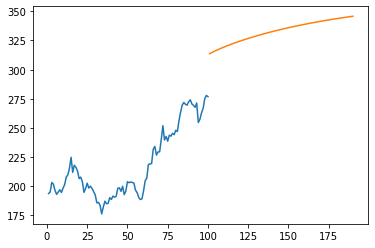

In [65]:
plt.plot(day_new,scaler.inverse_transform(df1[1379:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

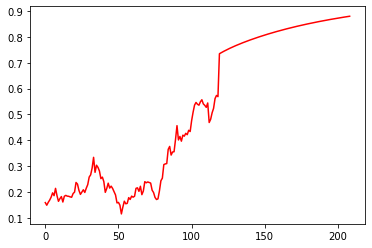

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1360:],color='r')

In [67]:
df3=scaler.inverse_transform(df3).tolist()

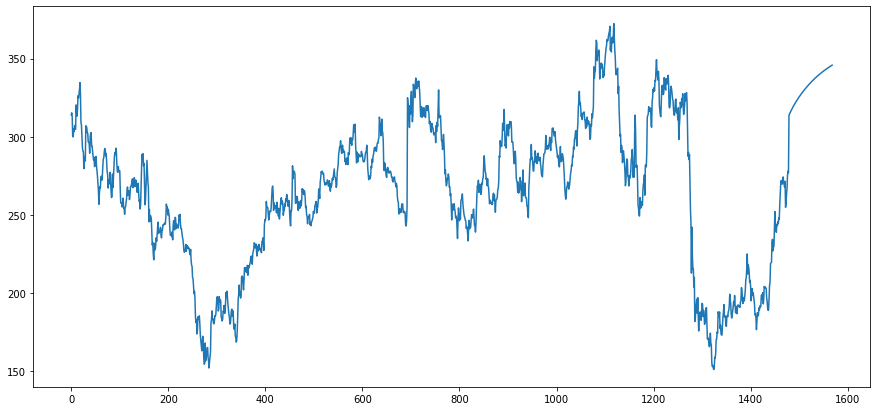

In [69]:

plt.figure(figsize=(15,7))
plt.plot(df3)
